<header style="padding:1px;background:#f9f9f9;border-top:3px solid #00b2b1"><img id="Teradata-logo" src="https://www.teradata.com/Teradata/Images/Rebrand/Teradata_logo-two_color.png" alt="Teradata" width="220" align="right" />

<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>Austin Bike Share</b>
</header>

<p style = 'font-size:16px;font-family:Arial'><b>Links:</b></p>
<ul style = 'font-size:16px;font-family:Arial'>
    <li>Information about Geospatial datatype can be found at: <a href = 'https://docs.teradata.com/r/Teradata-VantageTM-Geospatial-Data-Types/July-2021'>https://docs.teradata.com/r/Teradata-VantageTM-Geospatial-Data-Types/July-2021</a></li>
    <li>Information about Temporal datatype can be found at: <a href = 'https://docs.teradata.com/r/Teradata-VantageTM-Temporal-Table-Support/July-2021'>https://docs.teradata.com/r/Teradata-VantageTM-Temporal-Table-Support/July-2021</a></li>
</ul>

<p style = 'font-size:16px;font-family:Arial'><b>Contents</b></p>
<ol style = 'font-size:16px;font-family:Arial'>
    <li>Connect to Teradata </li>
    <li>Explore the data </li>
    <li>Load local data </li>
    <li>Create and Explore Temporal, Time index and Geospatial data </li>
    <li>Clean up </li>
<hr>

<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'><b>Experience</b></p>


<p style = 'font-size:16px;font-family:Arial'>This demo takes about 15 minutes to run.</p>

<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>1. Connect to Teradata</b>

<p style = 'font-size:16px;font-family:Arial'>This is a Teradata SQL Kernel in Jupyter, but how do I connect to Teradata? What can I do?</p>
<p style = 'font-size:16px;font-family:Arial'>Let's start by checking the main help page</p>

In [1]:
%help dataload

#### %dataload
Load a CSV file into a database table.

%dataload database=&lt;DatabaseName&gt;, table=&lt;TableName&gt;, filepath=&lt;Path to CSV file&gt; [, batchsize=&lt;Rows per Batch&gt;]

* The **filepath** is relative to the JupyterLab workspace (where JupyterLab was launched).
* You can specify an absolute file path by starting the path with the OS specific directory notation.
* **batchsize** specifies the number of rows per batch.
  * Valid values are between 1 and 16383. The default value is 5000.
* The maximum number of rows that the **%dataload** magic will load is currently set to 100,000 rows.  Loading will stop when the maximum is reached.
* The data must be in the proper format to insert into the columns of your table. Specifically, data types must match and any data constraints must be met. 
No pre-processing of the data file is performed.
* If an error occurs while attempting to load your data, the entire load operation will be rolled back. 
* The status of your dataload is stored in the Teradata SQL History.

<p style = 'font-size:16px;font-family:Arial'>Ok, to connect I need to use %connect, so let's see what connections already exist with %lsconnect:</p>

In [2]:
%lsconnect

Disconnected: NAME=Transcend-Production, USER=, HOST=tdprd.td.teradata.com, PROPS="logMech=JWT,logmech=JWT"
Disconnected: NAME=Transcend-Production-AWS, USER=, HOST=tdprd2.td.teradata.com, PROPS="logMech=JWT,logmech=JWT"
Disconnected: NAME=Vantage-LIVE, USER=, HOST=tdprd3.td.teradata.com, PROPS="logmech=JWT,logMech=JWT"


<p style = 'font-size:16px;font-family:Arial'>Here is the help page for %connect</p>    

In [3]:
%help connect

#### %connect
Connect to a Vantage system and/or make the connection active

%connect | %%connect [name=]&lt;Connection Name&gt; [, user=&lt;User Name&gt;] [, database=&lt;Default Database&gt;] [, rowcount=&lt;Row Count&gt;] [, props="&lt;DB Properties&gt;"]
				
* **%connect** will make the named connection the active connection.
* **%%connect** is a cell magic command and can be followed on a new line in the same cell by a SQL statement.
  * The SQL statement must not be on the same line as the magic and it's parameters.
  * This will set the connection used for this SQL statement but will not change the active connection.
* **User Name** is required only if not already connected or if not using Single Sign-On.
	* A password is required only if not already connected or if not using Single Sign-On. A prompt will be displayed and the password can be entered in a hidden text field.
* **database="&lt;Default Database&gt;"** will set the default database for the connection. This will override the default database setting stored for the connection.
	* Executing the DATABASE SQL command statement will take precedence over the default database connection setting.
* **%help currentdb** command will display the current database value.   
* **rowcount** limits the number of rows displayed in the result set (e.g. rowcount=100).
  * If **rowcount** is provided with the cell magic, it will only be applied to the result set returned for the cell SQL statement.
* **%help rowcount** command will display the current rowcount value.
* **props="&lt;DB Properties&gt;"** is used to set or override certain supported connection properties. The supported properties are:

| Property        | Default | Description
|:----------------|:--------|:----------------------------------------------------------------
| **account**     |         | Specifies the Teradata Database account.
| **cop**         | true    | Specifies whether COP Discovery is performed.
| **coplast**     | false   | Specifies how COP Discovery determines the last COP hostname.
| **dbs_port**    | 1025    | Specifies the Teradata Database port number.
| **encryptdata** | true    | Controls encryption of data to database.  It is not recommended to set this to false.
| **log**         | 0       | Controls driver debug logging.
| **logdata**     |         | Specifies extra data for the chosen logon authentication method.
| **logmech**     | TD2     | Specifies the logon authentication method. Supported values are **TD2**,**LDAP**,**TDNEGO**.
| **sip_support** | true    | Controls whether StatementInfo parcel is used.
| **tmode**       | DEFAULT | Specifies the transaction mode. Possible values are **DEFAULT**, **ANSI**, or **TERA** (must be uppercase).

For more detailed information on the supported properties see
https://github.com/Teradata/jupyterextensions/blob/master/docs/CONNECTIONPARAMETERS.md

* Multiple DB properties can be passed in a comma-separated list, e.g. props="encryptdata=false, tmode=ANSI".
* Use of any unsupported properties will be ignored or errors will be reported as appropriate.

The **Connection Manager** can also be used to manage Teradata connections. The Connection Manager can be
accessed from the left-hand, vertical toolbar, by selecting the Manage Teradata Connections icon. The Connection Manager will
display the list of connections, with the option to **test** the connection. If you hover over a connection, the details for that connection are provided in a pop-up message.
Options are also provided in the Connection Manager toolbar to **refresh** the list of connections.

<p style = 'font-size:16px;font-family:Arial'>Let's connect to our Teradata system</p>       

In [4]:
%connect Vantage-LIVE

Success: 'Vantage-LIVE' connection established and activated for user 'nl186010'


<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>2. Explore the data</b>

<p style = 'font-size:16px;font-family:Arial'>Let's see what tables we have in this demo DataLab</p>    

Source: [Github Austin Bike Share Demo](https://consulting-github.teradata.com/Vantage-Demos/Demos/tree/master/AustinBikeShare)

In [5]:
SELECT 
    DatabaseName,
    TableName
FROM
    DBC.Tables
WHERE
    DatabaseName = 'TRNG_AustinBikeShare'
    AND TableKind='T'

,DatabaseName,TableName
1,TRNG_AustinBikeShare,trips
2,TRNG_AustinBikeShare,Weather
3,TRNG_AustinBikeShare,stations
4,TRNG_AustinBikeShare,weather_temporal


<p style = 'font-size:16px;font-family:Arial'>We can explore the tables manually as below, or start a new Teradata Navigator tab</p>    

In [6]:
SELECT
    TOP 10
    *
FROM
    TRNG_AustinBikeShare.trips

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,MONTH_NUM,start_station_id,start_station_name,start_time,subscriber_type,trip_id,YEAR_NUM
1,283,0:45:08,6,2542,Plaza Saltillo,11,2571,Red River & 8th Street,2016-11-04 00:45:08.000000,Local30,12676850,2016
2,191,14:12:00,6,2567,Palmer Auditorium,5,2566,Pfluger Bridge @ W 2nd Street,2015-05-01 14:12:00.000000,Walk Up,9900139498,2015
3,134,13:12:26,69,2569,East 11th St. & San Marcos,9,2569,East 11th St. & San Marcos,2015-09-26 13:12:26.000000,Walk Up,9900263379,2015
4,411,17:11:39,79,2494,2nd & Congress,10,2494,2nd & Congress,2016-10-24 17:11:39.000000,Walk Up,12536268,2016
5,432,13:12:00,1,2503,South Congress & James,2,2503,South Congress & James,2014-02-15 13:12:00.000000,24-Hour Kiosk (Austin B-cycle),9900024202,2014
6,680,21:47:00,18,2707,Rainey St @ Cummings,8,2575,Riverside @ S. Lamar,2016-08-03 21:47:00.000000,Walk Up,11255940,2016
7,576,19:12:00,29,2537,West & 6th St.,7,2547,Guadalupe & 21st,2015-07-03 19:12:00.000000,Walk Up,9900198655,2015
8,855,23:42:56,8,3513,South Congress & Barton Springs at the Austin American-Statesman,1,3390,Brazos & 6th,2017-01-20 23:42:56.000000,Local365,13498543,2017
9,663,10:12:00,39,1002,6th & Navasota St.,4,,ACC - West & 12th,2014-04-18 10:12:00.000000,24-Hour Kiosk (Austin B-cycle),9900100060,2014
10,523,22:12:00,8,,Convention Center/ 3rd & Trinity,10,2502,Barton Springs & Riverside,2014-10-10 22:12:00.000000,24-Hour Kiosk (Austin B-cycle),9900274513,2014


<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>3.Load local data</b>

<p style = 'font-size:16px;font-family:Arial'>Alternatively, we can load local data and prepare those tables</p>

<p style = 'font-size:16px;font-family:Arial'>We will create a few tables in our personal database</p>    

<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'>Please change the database name according to your quicklook id</p>

In [7]:
DATABASE nl186010;

Success: 1 rows affected

<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'><b>3.1 Load Stations data from local file (in Jupyter)</b></p>    

In [8]:
CREATE TABLE stations_staging (
    lat            DECIMAL(18,5),
    location       VARCHAR(200),    -- e.g. "POINT(30.27041 -97.75046)"
    longitude      DECIMAL(18,5),
    name           VARCHAR(100),
    station_id     INTEGER,
    status         VARCHAR(50)
)
PRIMARY INDEX (station_id);

Success: 0 rows affected

<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'>Please change the database name according to your quicklook id</p>

In [9]:
%dataload DATABASE=nl186010, TABLE=stations_staging, FILEPATH=Demos/UseCases/AustinBikeShare/stations_staging.csv

2022-04-07T10:10:49.725 Start Loading...
     
Data Load: Number Rows Loaded = 72, Elapsed Time = 00:00:00.257, History ID = 1027
Success Loading Data: from file,'/home/jovyan/Demos/UseCases/AustinBikeShare/stations_staging.csv', into table, nl186010.stations_staging.

In [10]:
SELECT TOP 10 * FROM stations_staging

,lat,location,longitude,name,station_id,status
1,30.26019,POINT(30.26019 -97.73845),-97.73845,Davis at Rainey Street,2563,active
2,30.26694,POINT(30.26694 -97.74939),-97.74939,Nueces @ 3rd,1008,moved
3,30.26968,POINT(30.26968 -97.73074),-97.73074,East 11th St. & San Marcos,2569,active
4,30.25579,POINT(30.25579 -97.73982),-97.73982,Rainey St @ Cummings,2707,active
5,30.27624,POINT(30.27624 -97.74831),-97.74831,ACC - West & 12th Street,2546,closed
6,30.26416,POINT(30.26416 -97.73289),-97.73289,5th & San Marcos,2564,moved
7,30.26200,POINT(30.262 -97.76118),-97.76118,Barton Springs @ Kinney Ave,2711,active
8,30.26383,POINT(30.26383 -97.72864),-97.72864,6th & Navasota St.,1002,closed
9,30.27907,POINT(30.27907 -97.73715),-97.73715,State Parking Garage @ Brazos & 18th,1005,closed
10,30.28576,POINT(30.28576 -97.74181),-97.74181,UT West Mall @ Guadalupe,2548,active


In [11]:
CREATE TABLE stations (
    lat            DECIMAL(18,5),
    location       SYSUDTLIB.ST_Geometry,     -- e.g. "POINT(30.27041 -97.75046)"
    longitude      DECIMAL(18,5),
    name           VARCHAR(100),
    station_id     INTEGER,
    status         VARCHAR(50)
)
PRIMARY INDEX (station_id);

Success: 0 rows affected

In [12]:
INSERT INTO stations SELECT * FROM stations_staging

Success: 72 rows affected

In [13]:
SELECT
    TOP 10 *
FROM
    stations

,lat,location,longitude,name,station_id,status
1,30.26694,POINT (30.26694 -97.74939),-97.74939,Nueces @ 3rd,1008,moved
2,30.26019,POINT (30.26019 -97.73845),-97.73845,Davis at Rainey Street,2563,active
3,30.26968,POINT (30.26968 -97.73074),-97.73074,East 11th St. & San Marcos,2569,active
4,30.25579,POINT (30.25579 -97.73982),-97.73982,Rainey St @ Cummings,2707,active
5,30.27624,POINT (30.27624 -97.74831),-97.74831,ACC - West & 12th Street,2546,closed
6,30.26416,POINT (30.26416 -97.73289),-97.73289,5th & San Marcos,2564,moved
7,30.28576,POINT (30.28576 -97.74181),-97.74181,UT West Mall @ Guadalupe,2548,active
8,30.26383,POINT (30.26383 -97.72864),-97.72864,6th & Navasota St.,1002,closed
9,30.25839,POINT (30.25839 -97.74592),-97.74592,South Congress & Barton Springs at the Austin American-Statesman,3513,active
10,30.26200,POINT (30.262 -97.76118),-97.76118,Barton Springs @ Kinney Ave,2711,active


<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'><b>3.2 Load Trips data from local file(s)</b></p>    

Note that ```%dataload``` is currently limited to 100,000 rows. So, we can use the Linux command split, e.g. ```split -l 100000  trips.csv trips_```

In [14]:
CREATE TABLE trips_staging (
      bikeid             FLOAT,
      checkout_time      VARCHAR(50),
      duration_minutes   FLOAT,
      end_station_id     FLOAT,
      end_station_name   VARCHAR(100),
      MONTH_NUM          FLOAT,
      start_station_id   FLOAT,
      start_station_name VARCHAR(100),
      start_time         TIMESTAMP(6),
      subscriber_type    VARCHAR(50),
      trip_id            BIGINT,
      YEAR_NUM           FLOAT
)
PRIMARY INDEX (trip_id);

Success: 0 rows affected

<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'>Please change the database name according to your quicklook id in below %dataload commands</p>

In [15]:
%dataload DATABASE=nl186010, TABLE=trips_staging, FILEPATH=Demos/UseCases/AustinBikeShare/trips_1.csv

2022-04-07T10:10:50.619 Start Loading...
     
Data Load: Hit row limit, rowcount = '100000'
     
Data Load: Number Rows Loaded = 100,000, Elapsed Time = 00:00:12.759, History ID = 1033
Success Loading Data: from file,'/home/jovyan/Demos/UseCases/AustinBikeShare/trips_1.csv', into table, nl186010.trips_staging.

In [16]:
%dataload DATABASE=nl186010, TABLE=trips_staging, FILEPATH=Demos/UseCases/AustinBikeShare/trips_2.csv

2022-04-07T10:11:03.425 Start Loading...
     
Data Load: Hit row limit, rowcount = '100000'
     
Data Load: Number Rows Loaded = 100,000, Elapsed Time = 00:00:12.318, History ID = 1034
Success Loading Data: from file,'/home/jovyan/Demos/UseCases/AustinBikeShare/trips_2.csv', into table, nl186010.trips_staging.

In [17]:
%dataload DATABASE=nl186010, TABLE=trips_staging, FILEPATH=Demos/UseCases/AustinBikeShare/trips_3.csv

2022-04-07T10:11:15.716 Start Loading...
     
Data Load: Hit row limit, rowcount = '100000'
     
Data Load: Number Rows Loaded = 100,000, Elapsed Time = 00:00:13.216, History ID = 1035
Success Loading Data: from file,'/home/jovyan/Demos/UseCases/AustinBikeShare/trips_3.csv', into table, nl186010.trips_staging.

In [18]:
%dataload DATABASE=nl186010, TABLE=trips_staging, FILEPATH=Demos/UseCases/AustinBikeShare/trips_4.csv

2022-04-07T10:11:28.936 Start Loading...
     
Data Load: Number Rows Loaded = 100,000, Elapsed Time = 00:00:14.005, History ID = 1036
Success Loading Data: from file,'/home/jovyan/Demos/UseCases/AustinBikeShare/trips_4.csv', into table, nl186010.trips_staging.

In [19]:
%dataload DATABASE=nl186010, TABLE=trips_staging, FILEPATH=Demos/UseCases/AustinBikeShare/trips_5.csv

2022-04-07T10:11:42.929 Start Loading...
     
Data Load: Hit row limit, rowcount = '100000'
     
Data Load: Number Rows Loaded = 100,000, Elapsed Time = 00:00:16.399, History ID = 1037
Success Loading Data: from file,'/home/jovyan/Demos/UseCases/AustinBikeShare/trips_5.csv', into table, nl186010.trips_staging.

In [20]:
%dataload DATABASE=nl186010, TABLE=trips_staging, FILEPATH=Demos/UseCases/AustinBikeShare/trips_6.csv

2022-04-07T10:11:59.376 Start Loading...
     
Data Load: Hit row limit, rowcount = '100000'
     
Data Load: Number Rows Loaded = 100,000, Elapsed Time = 00:00:16.110, History ID = 1038
Success Loading Data: from file,'/home/jovyan/Demos/UseCases/AustinBikeShare/trips_6.csv', into table, nl186010.trips_staging.

In [21]:
%dataload DATABASE=nl186010, TABLE=trips_staging, FILEPATH=Demos/UseCases/AustinBikeShare/trips_7.csv

2022-04-07T10:12:15.489 Start Loading...
     
Data Load: Number Rows Loaded = 49,231, Elapsed Time = 00:00:07.381, History ID = 1039
Success Loading Data: from file,'/home/jovyan/Demos/UseCases/AustinBikeShare/trips_7.csv', into table, nl186010.trips_staging.

In [22]:
CREATE TABLE trips (
      bikeid             INTEGER,
      checkout_time      VARCHAR(50),
      duration_minutes   INTEGER,
      end_station_id     INTEGER,
      end_station_name   VARCHAR(100),
      MONTH_NUM          INTEGER,
      start_station_id   INTEGER,
      start_station_name VARCHAR(100),
      start_time         TIMESTAMP(6),
      subscriber_type    VARCHAR(50),
      trip_id            BIGINT,
      YEAR_NUM           INTEGER
)
PRIMARY INDEX (trip_id);

Success: 0 rows affected

In [23]:
INSERT INTO trips 
SELECT
    CAST(bikeid AS INTEGER),    
    checkout_time,
    CAST(duration_minutes AS INTEGER),    
    CAST(end_station_id AS INTEGER),    
    end_station_name,
    CAST(MONTH_NUM AS INTEGER),    
    CAST(start_station_id AS INTEGER),    
    start_station_name,
    start_time,
    subscriber_type,
    trip_id,
    CAST(YEAR_NUM AS INTEGER)
FROM 
    trips_staging;

Success: 649231 rows affected

In [24]:
SELECT TOP 10 * FROM trips

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,MONTH_NUM,start_station_id,start_station_name,start_time,subscriber_type,trip_id,YEAR_NUM
1,272,17:17:48,19,3293,East 2nd & Pedernales,10,2569,East 11th St. & San Marcos,2016-10-21 17:17:48.000000,Walk Up,12496830,2016
2,545,10:12:00,7,2495,4th & Congress,5,2567,Palmer Auditorium,2014-05-22 10:12:00.000000,Annual Membership (Austin B-cycle),9900133931,2014
3,588,14:19:04,14,3513,South Congress & Barton Springs at the Austin American-Statesman,9,2711,Barton Springs @ Kinney Ave,2016-09-17 14:19:04.000000,Walk Up,11967904,2016
4,25,18:12:00,9,2542,Plaza Saltillo,7,2495,4th & Congress,2015-07-30 18:12:00.000000,Local365,9900212807,2015
5,862,20:59:27,11,2496,8th & Congress,2,2503,South Congress & James,2017-02-12 20:59:27.000000,Walk Up,13709885,2017
6,522,15:17:05,39,2549,Long Center @ South 1st & Riverside,3,2549,Long Center @ South 1st & Riverside,2016-03-19 15:17:05.000000,Walk Up,9201942,2016
7,843,11:12:41,14,2495,4th & Congress,10,2569,East 11th St. & San Marcos,2015-10-31 11:12:41.000000,Local365,9900311402,2015
8,387,13:12:00,18,2499,City Hall / Lavaca & 2nd,11,2548,UT West Mall @ Guadalupe,2014-11-07 13:12:00.000000,24-Hour Kiosk (Austin B-cycle),9900313951,2014
9,425,13:12:00,7,2501,5th & Bowie,4,2712,Toomey Rd @ South Lamar,2015-04-23 13:12:00.000000,Local365,9900119779,2015
10,220,15:12:00,12,2565,Trinity & 6th Street,3,2822,East 6th at Robert Martinez,2015-03-16 15:12:00.000000,7-Day,9900074774,2015


In [25]:
SELECT
    TOP 20
    start_station_name,
    COUNT(1) AS trips
FROM
    trips
GROUP BY 1
ORDER BY 2 DESC

,start_station_name,trips
1,Riverside @ S. Lamar,28695
2,City Hall / Lavaca & 2nd,28535
3,5th & Bowie,26669
4,2nd & Congress,26612
5,4th & Congress,24972
6,Convention Center / 4th St. @ MetroRail,24357
7,Rainey St @ Cummings,23468
8,Davis at Rainey Street,22273
9,Capitol Station / Congress & 11th,20056
10,Pfluger Bridge @ W 2nd Street,19434


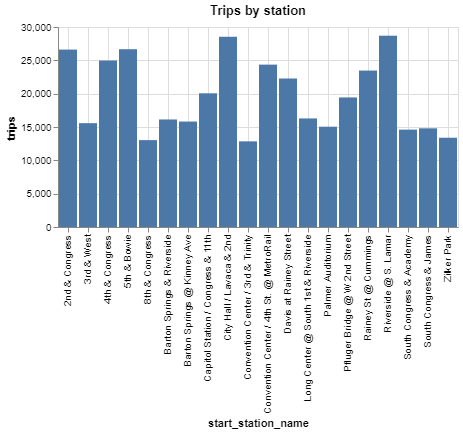

In [26]:
%chart start_station_name, trips, title=Trips by station

In [27]:
%help chart

#### %chart
Display a Vega-Lite visualization of a query result set or an existing Vega or VegaLite chart.

%chart x=&lt;XColumnName&gt;, y=&lt;YColumnName&gt;,</br>
[title=&lt;ChartTitle&gt;,] [id=&lt;ResultSetID&gt;|&lt;HistoryID&gt;,] [part=&lt;PartNum&gt;]</br>
[labelx=&lt;XLabel&gt;,] [labely=&lt;YLabel&gt;,]</br>
[gridx=&lt;ttrue|false&gt;,] [gridy=&lt;true|false&gt;,]</br>
[typex=&lt;q|n|o|t&gt;,] [typey=&lt;q|n|o|t&gt;,]</br>
[mark=&lt;area|bar|circle|line|point|rect|rule|square|text|tick&gt;,]</br>
[color=&lt;CSSColorSpec&gt;,] [height=&lt;ChartHeight&gt;,] [width=&lt;ChartWidth&gt;]</br>
[spec=&lt;ChartSpec&gt;, [data=&lt;ChartData&gt;]]

* **typex** and **typey** values: q=quantitative n=nominal o=ordinal t=temporal
  * (defaults based on column type: numeric types -> quantitative, time times -> temporal, other types -> nominal)
* **&lt;ResultSetID&gt;** is the timestamp/directory name of the result set.
* **&lt;HistoryID&gt;** is the id of the history item (see **%history** command).
* If the **id** is not specified, the most recently accessed result set is displayed.
* The **spec** parameter is used to display an existing chart spec.
* If **spec** is used, only **data**, **id**, and **part** parameters are supported.

In [28]:
SELECT    
    TRUNC(start_time,'DAY') AS start_date,
    COUNT(1) AS trips
FROM
    trips
GROUP BY 1
ORDER BY 1

,start_date,trips
1,2013-12-15,103
2,2013-12-22,852
3,2013-12-29,1149
4,2014-01-05,567
5,2014-01-12,837
6,2014-01-19,771
7,2014-01-26,838
8,2014-02-02,586
9,2014-02-09,1531
10,2014-02-16,1903


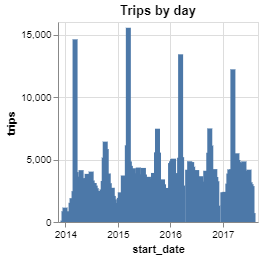

In [29]:
%chart start_date, trips, title=Trips by day, typex=t

<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'><b>3.4 Load local data into table weather</b></p>    

In [30]:
CREATE TABLE weather_staging (
    dt            TIMESTAMP(0),
    temp          FLOAT,
    temp_min      FLOAT,
    temp_max      FLOAT,
    pressure      INTEGER,
    humidity      INTEGER,
    wind_speed    INTEGER,
    wind_deg      INTEGER,
    rain_1h       FLOAT,
    rain_3h       FLOAT,
    clouds        INTEGER,
    weather_id    INTEGER,
    weather_main  VARCHAR(50),
    weather_desc  VARCHAR(50),
    weather_icon  VARCHAR(50)
)
NO PRIMARY INDEX;

Success: 0 rows affected

<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'>Please change the database name according to your quicklook id n below %dataload command</p>

In [31]:
%dataload  DATABASE=nl186010, TABLE=weather_staging, FILEPATH=Demos/UseCases/AustinBikeShare/weather.csv

2022-04-07T10:12:23.872 Start Loading...
     
Data Load: Number Rows Loaded = 24,606, Elapsed Time = 00:00:03.481, History ID = 1046
Success Loading Data: from file,'/home/jovyan/Demos/UseCases/AustinBikeShare/weather.csv', into table, nl186010.weather_staging.

In [32]:
CREATE TABLE weather (
    dt            TIMESTAMP(0),
    temp          FLOAT,
    temp_min      FLOAT,
    temp_max      FLOAT,
    pressure      INTEGER,
    humidity      INTEGER,
    wind_speed    INTEGER,
    wind_deg      INTEGER,
    rain_1h       FLOAT,
    rain_3h       FLOAT,
    clouds        INTEGER,
    weather_id    INTEGER,
    weather_main  VARCHAR(50),
    weather_desc  VARCHAR(50),
    weather_icon  VARCHAR(50)
)
PRIMARY INDEX(dt);

Success: 0 rows affected

In [33]:
INSERT INTO weather SELECT * FROM weather_staging

Success: 24592 rows affected

In [34]:
SELECT TOP 10 * FROM weather

,dt,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,clouds,weather_id,weather_main,weather_desc,weather_icon
1,2014-05-20 05:00:00,294.2699890136719,293.1499938964844,295.3699951171875,1014,64,1,0,,,0,800,Clear,Sky is Clear,01n
2,2013-12-24 17:00:00,281.54998779296875,279.82000732421875,283.1499938964844,1032,55,2,161,,0,0,800,Clear,Sky is Clear,01d
3,2016-12-24 02:00:00,291.42999267578125,289.1499938964844,294.1499938964844,1017,93,3,200,,,90,500,Rain,light rain,10n
4,2015-10-08 12:00:00,292.3699951171875,290.1499938964844,294.1499938964844,1017,88,0,153,,,75,803,Clouds,broken clouds,04n
5,2017-09-25 00:00:00,301.6000061035156,300.1499938964844,303.1499938964844,1011,65,3,150,,,20,801,Clouds,few clouds,02d
6,2016-09-25 05:00:00,297.2699890136719,296.4800109863281,297.75,1014,94,4,153,,0,64,803,Clouds,broken clouds,04n
7,2016-10-08 07:00:00,292.6629943847656,292.6629943847656,292.6629943847656,1010,75,6,7,,,0,800,Clear,Sky is Clear,01n
8,2016-12-24 02:00:00,291.42999267578125,289.1499938964844,294.1499938964844,1017,93,3,200,,,90,701,Mist,mist,50n
9,2014-03-23 09:00:00,286.2099914550781,284.82000732421875,287.5899963378906,1019,67,2,360,,,90,804,Clouds,overcast clouds,4
10,2014-03-31 08:00:00,288.30999755859375,287.5899963378906,289.1499938964844,1016,77,5,160,,,90,804,Clouds,overcast clouds,4


In [35]:
SELECT    
    TRUNC(dt,'DAY') AS dt,
    AVG(temp) AS avg_temp
FROM
    weather
GROUP BY 1
ORDER BY 1

,dt,avg_temp
1,2013-12-15,285.56625270843506
2,2013-12-22,279.9445611953735
3,2013-12-29,279.6733713032287
4,2014-01-05,281.8405904535002
5,2014-01-12,285.65487428990804
6,2014-01-19,281.58417178663007
7,2014-01-26,282.22880270952237
8,2014-02-02,276.3663686116536
9,2014-02-09,281.3410713559105
10,2014-02-16,290.24446578252883


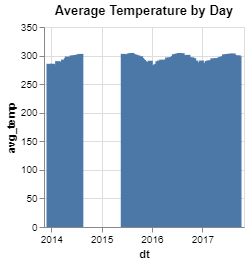

In [36]:
%chart dt, avg_temp, title=Average Temperature by Day

<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>4. Create and Explore Temporal, Time index and Geospatial data</b>    

<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'><b>4.1 Create a temporal table with weather data</b></p>    

In [37]:
CREATE TABLE weather_temporal (
    begin_dt      TIMESTAMP(0) NOT NULL,
    end_dt        TIMESTAMP(0) NOT NULL,
    temp          FLOAT,
    temp_min      FLOAT,
    temp_max      FLOAT,
    pressure      INTEGER,
    humidity      INTEGER,
    wind_speed    INTEGER,
    wind_deg      INTEGER,
    rain_1h       FLOAT,
    rain_3h       FLOAT,
    clouds        INTEGER,
    weather_id    INTEGER,
    weather_main  VARCHAR(50),
    weather_desc  VARCHAR(50),
    weather_icon  VARCHAR(50),
    PERIOD FOR Weather_Duration(begin_dt,end_dt) AS VALIDTIME
)
PRIMARY INDEX (weather_id);

Success: 0 rows affected

In [38]:
INSERT INTO weather_temporal
SELECT
    dt,
    dt + INTERVAL '59' MINUTE + INTERVAL '59' SECOND,
    temp,
    temp_min,
    temp_max,
    pressure,
    humidity,
    wind_speed,
    wind_deg,
    rain_1h,
    rain_3h,
    clouds,
    weather_id,
    weather_main,
    weather_desc,
    weather_icon
FROM 
    weather;

Success: 24592 rows affected

In [39]:
SELECT TOP 10 * FROM weather_temporal;

,begin_dt,end_dt,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,clouds,weather_id,weather_main,weather_desc,weather_icon
1,2016-01-06 00:00:00,2016-01-06 00:59:59,284.1099853515625,283.1499938964844,285.1499938964844,1023,66,2,50,,,75,803,Clouds,broken clouds,04n
2,2016-09-07 06:00:00,2016-09-07 06:59:59,298.6600036621094,298.1499938964844,299.260009765625,1020,94,2,0,,,90,804,Clouds,overcast clouds,04n
3,2016-12-03 23:00:00,2016-12-03 23:59:59,283.3999938964844,283.1499938964844,284.1499938964844,1014,93,1,0,,,90,520,Rain,light intensity shower rain,09d
4,2016-07-27 12:00:00,2016-07-27 12:59:59,296.7699890136719,296.1499938964844,297.25,1016,94,2,0,1.5199999809265137,,90,200,Thunderstorm,thunderstorm with light rain,11d
5,2015-12-27 21:00:00,2015-12-27 21:59:59,278.8800048828125,277.1499938964844,280.3699951171875,1006,93,6,320,0.25,,90,230,Thunderstorm,thunderstorm with light drizzle,11d
6,2016-04-06 15:00:00,2016-04-06 15:59:59,292.7200012207031,292.1499938964844,293.1499938964844,1020,68,3,230,,,40,802,Clouds,scattered clouds,03d
7,2015-10-15 15:00:00,2015-10-15 15:59:59,296.67999267578125,294.82000732421875,299.1499938964844,1021,73,4,220,,,1,711,Smoke,smoke,50d
8,2017-01-05 23:00:00,2017-01-05 23:59:59,279.989990234375,277.1499938964844,282.1499938964844,1014,61,4,30,,,90,721,Haze,haze,50d
9,2017-01-08 05:00:00,2017-01-08 05:59:59,269.6199951171875,267.1499938964844,272.1499938964844,1042,42,1,66,,,1,600,Snow,light snow,13n
10,2017-04-18 09:00:00,2017-04-18 09:59:59,288.75,286.1499938964844,291.1499938964844,1016,82,2,176,,,75,741,Fog,fog,50n


<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'><b>4.2 Create a view for all trips with start/end stations data and a GEOSEQUENCE with start/end lat/long/time</b></p>

In [40]:
REPLACE VIEW trips_geo AS
SELECT
    t.bikeid,
    t.trip_ID,
    t.subscriber_type,
    t.start_station_id,
    COALESCE(t.start_station_name, st.NAME) AS start_station_name,
    t.start_time,
    st.status starting_station_status,
    t.end_station_id,
    COALESCE(t.end_station_name, ed.NAME) AS end_station_name,
    t.start_time 
        + CAST(t.duration_minutes/60 AS INTERVAL HOUR(4)) 
        + CAST(t.duration_minutes MOD 60 AS INTERVAL MINUTE(4)) AS end_time,
    ed.status AS End_station_status,
    t.duration_minutes,
    CAST('GEOSEQUENCE( ('
        || COALESCE(st.Longitude,-98.272797)
        || ' '
        || COALESCE(st.Lat,30.578245)
        || ','
        || COALESCE(ed.longitude,-98.272797)
        || ' '
        || COALESCE(ed.lat,30.578245)
        || '), ('
        || CAST(CAST(t.start_time AS FORMAT 'yyyy-mm-ddbhh:mi:ss') AS VARCHAR(50))
        || ','
        || CAST(CAST(end_time AS FORMAT 'yyyy-mm-ddbhh:mi:ss') AS VARCHAR(50))
        || '), ('
        || '1,2), (0) )' AS ST_GEOMETRY) AS GEOM
FROM
    trips AS t
    LEFT JOIN stations AS st ON t.start_station_id = st.station_id
    LEFT JOIN stations AS ed ON t.end_station_id = ed.station_id;

Success: 0 rows affected

In [41]:
SELECT TOP 10 * FROM trips_geo

,bikeid,trip_id,subscriber_type,start_station_id,start_station_name,start_time,starting_station_status,end_station_id,end_station_name,end_time,End_station_status,duration_minutes,GEOM
1,435,9900181954,Local365,2495,4th & Congress,2015-06-28 20:12:00.000000,active,2549,Long Center @ South 1st & Riverside,2015-06-28 20:22:00.000000,active,10,"GEOSEQUENCE((-97.74378 30.26634,-97.74971 30.25941),(2015-06-28 20:12:00.000000,2015-06-28 20:22:00.000000),(1,2),(0))"
2,62,13431270,Local365,2563,Davis at Rainey Street,2017-01-13 16:37:51.000000,active,2565,Trinity & 6th Street,2017-01-13 17:07:51.000000,active,30,"GEOSEQUENCE((-97.73845 30.26019,-97.73933 30.26735),(2017-01-13 16:37:51.000000,2017-01-13 17:07:51.000000),(1,2),(0))"
3,765,10273946,Local365,2546,ACC - West & 12th Street,2016-06-01 17:40:15.000000,closed,2497,Capitol Station / Congress & 11th,2016-06-01 17:45:15.000000,active,5,"GEOSEQUENCE((-97.74831 30.27624,-97.74127 30.2726),(2016-06-01 17:40:15.000000,2016-06-01 17:45:15.000000),(1,2),(0))"
4,400,14945208,Walk Up,2538,Bullock Museum @ Congress & MLK,2017-05-27 16:48:14.000000,active,2547,Guadalupe & 21st,2017-05-27 17:06:14.000000,moved,18,"GEOSEQUENCE((-97.73809 30.28039,-97.74198 30.28395),(2017-05-27 16:48:14.000000,2017-05-27 17:06:14.000000),(1,2),(0))"
5,385,9900257812,Walk Up,2504,South Congress & Elizabeth,2015-09-14 14:12:51.000000,active,2561,State Capitol Visitors Garage @ San Jacinto & 12th,2015-09-14 14:37:51.000000,active,25,"GEOSEQUENCE((-97.75019 30.24891,-97.73805 30.27336),(2015-09-14 14:12:51.000000,2015-09-14 14:37:51.000000),(1,2),(0))"
6,396,9900283098,24-Hour Kiosk (Austin B-cycle),2567,Palmer Auditorium,2014-10-21 11:12:00.000000,active,2566,Pfluger Bridge @ W 2nd Street,2014-10-21 11:27:00.000000,active,15,"GEOSEQUENCE((-97.75346 30.25971,-97.75484 30.26717),(2014-10-21 11:12:00.000000,2014-10-21 11:27:00.000000),(1,2),(0))"
7,283,13597138,Local365,2540,17th & Guadalupe,2017-01-31 17:19:24.000000,active,3292,East 4th & Chicon,2017-01-31 17:33:24.000000,active,14,"GEOSEQUENCE((-97.74254 30.27974,-97.72373 30.25987),(2017-01-31 17:19:24.000000,2017-01-31 17:33:24.000000),(1,2),(0))"
8,420,13507128,Walk Up,3390,Brazos & 6th,2017-01-21 20:50:10.000000,active,2563,Davis at Rainey Street,2017-01-21 21:02:10.000000,active,12,"GEOSEQUENCE((-97.74154 30.26754,-97.73845 30.26019),(2017-01-21 20:50:10.000000,2017-01-21 21:02:10.000000),(1,2),(0))"
9,540,9900173369,Walk Up,2571,Red River & 8th Street,2015-06-10 11:12:00.000000,active,2498,Convention Center / 4th St. @ MetroRail,2015-06-10 11:15:00.000000,active,3,"GEOSEQUENCE((-97.73646 30.26854,-97.739 30.26483),(2015-06-10 11:12:00.000000,2015-06-10 11:15:00.000000),(1,2),(0))"
10,311,14081059,Walk Up,2571,Red River & 8th Street,2017-03-17 16:27:02.000000,active,3292,East 4th & Chicon,2017-03-17 16:37:02.000000,active,10,"GEOSEQUENCE((-97.73646 30.26854,-97.72373 30.25987),(2017-03-17 16:27:02.000000,2017-03-17 16:37:02.000000),(1,2),(0))"


<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'><b>4.3 Create a Time Index table of the trips to accelerate time related analysis</b></p>    

In [42]:
CREATE TABLE trips_geo_pti (
    bikeid                    INTEGER,
    trip_id                   BIGINT,
    subscriber_type           VARCHAR(50),
    start_station_id          INTEGER,
    start_station_name        VARCHAR(100),
    starting_station_status   VARCHAR(50),
    end_station_id            INTEGER,
    end_station_name          VARCHAR(100),
    end_time                  TIMESTAMP(6),
    end_station_status        VARCHAR(50),
    duration_minutes          INTEGER,
    geom                      SYSUDTLIB.ST_GEOMETRY(16776192) INLINE LENGTH 9920
)
PRIMARY TIME INDEX (TIMESTAMP(6), DATE '2013-12-20', MINUTES(60));

Success: 0 rows affected

In [43]:
INSERT INTO trips_geo_pti
SELECT
    start_time,
    bikeid,
    trip_id,
    subscriber_type,
    start_station_id,
    start_station_name,
    starting_station_status,
    end_station_id,
    end_station_name,
    end_time,
    End_station_status,
    duration_minutes,
    geom
FROM
    trips_geo;

Success: 649231 rows affected

In [44]:
SELECT TOP 10 * FROM trips_geo_pti

,TD_TIMECODE,bikeid,trip_id,subscriber_type,start_station_id,start_station_name,starting_station_status,end_station_id,end_station_name,end_time,end_station_status,duration_minutes,geom
1,2013-12-27 20:12:00.000000,951,9900334732,Annual Membership (Austin B-cycle),2495,4th & Congress,active,2501,5th & Bowie,2013-12-27 20:17:00.000000,active,5,"GEOSEQUENCE((-97.74378 30.26634,-97.75332 30.2696),(2013-12-27 20:12:00.000000,2013-12-27 20:17:00.000000),(1,2),(0))"
2,2014-01-11 08:12:00.000000,54,9900000947,7-Day Membership (Austin B-cycle),2496,8th & Congress,active,2496,8th & Congress,2014-01-11 10:01:00.000000,active,109,"GEOSEQUENCE((-97.74186 30.2698,-97.74186 30.2698),(2014-01-11 08:12:00.000000,2014-01-11 10:01:00.000000),(1,2),(0))"
3,2014-01-11 08:12:00.000000,646,9900000946,7-Day Membership (Austin B-cycle),2496,8th & Congress,active,2496,8th & Congress,2014-01-11 10:01:00.000000,active,109,"GEOSEQUENCE((-97.74186 30.2698,-97.74186 30.2698),(2014-01-11 08:12:00.000000,2014-01-11 10:01:00.000000),(1,2),(0))"
4,2014-01-11 08:12:00.000000,54,9900000945,7-Day Membership (Austin B-cycle),2496,8th & Congress,active,2496,8th & Congress,2014-01-11 08:13:00.000000,active,1,"GEOSEQUENCE((-97.74186 30.2698,-97.74186 30.2698),(2014-01-11 08:12:00.000000,2014-01-11 08:13:00.000000),(1,2),(0))"
5,2014-01-17 07:12:00.000000,980,9900001689,Annual Membership (Austin B-cycle),2497,Capitol Station / Congress & 11th,active,2499,City Hall / Lavaca & 2nd,2014-01-17 07:24:00.000000,active,12,"GEOSEQUENCE((-97.74127 30.2726,-97.74678 30.26476),(2014-01-17 07:12:00.000000,2014-01-17 07:24:00.000000),(1,2),(0))"
6,2014-01-17 07:12:00.000000,306,9900001688,24-Hour Kiosk (Austin B-cycle),2503,South Congress & James,active,2503,South Congress & James,2014-01-17 08:00:00.000000,active,48,"GEOSEQUENCE((-97.74926 30.25103,-97.74926 30.25103),(2014-01-17 07:12:00.000000,2014-01-17 08:00:00.000000),(1,2),(0))"
7,2014-01-17 07:12:00.000000,52,9900001687,24-Hour Kiosk (Austin B-cycle),2502,Barton Springs & Riverside,active,2494,2nd & Congress,2014-01-17 07:17:00.000000,active,5,"GEOSEQUENCE((-97.74872 30.2587,-97.74355 30.26408),(2014-01-17 07:12:00.000000,2014-01-17 07:17:00.000000),(1,2),(0))"
8,2013-12-27 20:12:00.000000,425,9900334735,24-Hour Kiosk (Austin B-cycle),2502,Barton Springs & Riverside,active,2498,Convention Center / 4th St. @ MetroRail,2013-12-27 20:26:00.000000,active,14,"GEOSEQUENCE((-97.74872 30.2587,-97.739 30.26483),(2013-12-27 20:12:00.000000,2013-12-27 20:26:00.000000),(1,2),(0))"
9,2013-12-27 20:12:00.000000,829,9900334733,24-Hour Kiosk (Austin B-cycle),2497,Capitol Station / Congress & 11th,active,2498,Convention Center / 4th St. @ MetroRail,2013-12-27 20:21:00.000000,active,9,"GEOSEQUENCE((-97.74127 30.2726,-97.739 30.26483),(2013-12-27 20:12:00.000000,2013-12-27 20:21:00.000000),(1,2),(0))"
10,2013-12-27 20:12:00.000000,975,9900334734,24-Hour Kiosk (Austin B-cycle),2497,Capitol Station / Congress & 11th,active,2498,Convention Center / 4th St. @ MetroRail,2013-12-27 20:21:00.000000,active,9,"GEOSEQUENCE((-97.74127 30.2726,-97.739 30.26483),(2013-12-27 20:12:00.000000,2013-12-27 20:21:00.000000),(1,2),(0))"


<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'><b>4.4 Augment trips data with weather data and extract geospatial information</b></p>    

In [45]:
CREATE TABLE trips_and_weather AS (
    SELECT 
        t.start_station_name,
        t.end_station_name,
        t.bikeid,
        t.trip_id,
        t.geom.GetInitT() AS pickup_time,
        t.geom.GetFinalT() AS dropoff_time,
        t.geom.ST_POINTN(1).ST_SPHEROIDALDISTANCE(geom.ST_POINTN(2))/1000 AS total_distance,
        t.geom.ST_POINTN(1).ST_X() AS pickup_location_lon,
        t.geom.ST_POINTN(1).ST_Y() AS pickup_location_lat,
        t.geom.ST_POINTN(2).ST_X() AS dropoff_location_lon,
        t.geom.ST_POINTN(2).ST_Y() AS dropoff_location_lat,        
        t.duration_minutes,
        t.TD_TIMECODE,
        wt.*
    FROM 
        trips_geo_pti AS t
        LEFT JOIN Weather_temporal AS wt ON wt.weather_duration CONTAINS t.TD_TIMECODE
)
WITH DATA;

Success: 0 rows affected

In [46]:
SELECT TOP 10 * FROM trips_and_weather

,start_station_name,end_station_name,bikeid,trip_id,pickup_time,dropoff_time,total_distance,pickup_location_lon,pickup_location_lat,dropoff_location_lon,dropoff_location_lat,duration_minutes,TD_TIMECODE,begin_dt,end_dt,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,clouds,weather_id,weather_main,weather_desc,weather_icon
1,Zilker Park,Pfluger Bridge @ W 2nd Street,938,12296023,2016-10-08 11:35:27.000000,2016-10-08 11:44:27.000000,1.2951972044141373,-97.76822,30.2659,-97.75484,30.26717,9,2016-10-08 11:35:27.000000,2016-10-08 11:00:00,2016-10-08 11:59:59,289.0409851074219,289.0409851074219,289.0409851074219,1011,72,6,3,,,0,800,Clear,Sky is Clear,01n
2,Zilker Park,Zilker Park,133,9848059,2016-05-04 17:03:34.000000,2016-05-04 19:15:34.000000,0,-97.76822,30.2659,-97.76822,30.2659,132,2016-05-04 17:03:34.000000,2016-05-04 17:00:00,2016-05-04 17:59:59,298.8299865722656,296.4800109863281,301.4800109863281,1020,39,4,310,,,1,800,Clear,sky is clear,01d
3,Zilker Park,Barton Springs Pool,881,13767140,2017-02-18 11:36:31.000000,2017-02-18 11:40:31.000000,0.3250166420001558,-97.76822,30.2659,-97.7712,30.26452,4,2017-02-18 11:36:31.000000,2017-02-18 11:00:00,2017-02-18 11:59:59,284.6610107421875,284.6610107421875,284.6610107421875,997,92,4,196,,,0,800,Clear,Sky is Clear,01n
4,Zilker Park,2nd & Congress,104,10506494,2016-06-16 20:19:59.000000,2016-06-16 20:41:59.000000,2.382525285502613,-97.76822,30.2659,-97.74355,30.26408,22,2016-06-16 20:19:59.000000,2016-06-16 20:00:00,2016-06-16 20:59:59,307.8900146484375,305.3699951171875,310.8500061035156,1013,53,5,136,,0,0,800,Clear,Sky is Clear,01d
5,Zilker Park,Zilker Park,822,9900018118,2016-01-22 14:12:42.000000,2016-01-22 14:28:42.000000,0,-97.76822,30.2659,-97.76822,30.2659,16,2016-01-22 14:12:42.000000,2016-01-22 14:00:00,2016-01-22 14:59:59,275.6499938964844,274.1499938964844,277.1499938964844,1026,74,5,330,,,20,801,Clouds,few clouds,02d
6,Zilker Park,State Capitol Visitors Garage @ San Jacinto & 12th,453,9900347732,2015-12-15 12:12:21.000000,2015-12-15 14:22:21.000000,3.018583566892411,-97.76822,30.2659,-97.73805,30.27336,130,2015-12-15 12:12:21.000000,2015-12-15 12:00:00,2015-12-15 12:59:59,285.6400146484375,284.1499938964844,288.1499938964844,1006,87,4,180,,,1,701,Mist,mist,50n
7,Zilker Park,San Jacinto & 8th Street,513,14335661,2017-04-06 16:52:54.000000,2017-04-06 17:17:54.000000,2.7522287614714034,-97.76822,30.2659,-97.73986,30.26912,25,2017-04-06 16:52:54.000000,2017-04-06 16:00:00,2017-04-06 16:59:59,293.2699890136719,292.1499938964844,294.1499938964844,1026,32,3,140,,,1,800,Clear,sky is clear,01d
8,Zilker Park,Riverside @ S. Lamar,230,9900296607,2015-10-09 20:12:50.000000,2015-10-10 15:43:50.000000,1.1247522012104383,-97.76822,30.2659,-97.75665,30.26446,1171,2015-10-09 20:12:50.000000,2015-10-09 20:00:00,2015-10-09 20:59:59,302.79998779296875,302.0400085449219,303.7099914550781,1019,45,2,50,,,20,801,Clouds,few clouds,02d
9,Zilker Park,Barton Springs & Riverside,669,9900251769,2015-09-04 15:12:03.000000,2015-09-04 18:24:03.000000,2.0392112139140575,-97.76822,30.2659,-97.74872,30.2587,192,2015-09-04 15:12:03.000000,2015-09-04 15:00:00,2015-09-04 15:59:59,301.42999267578125,300.1499938964844,303.1499938964844,1015,62,2,0,,,75,803,Clouds,broken clouds,04d
10,Zilker Park,Zilker Park,420,15135191,2017-06-16 11:41:29.000000,2017-06-16 12:41:29.000000,0,-97.76822,30.2659,-97.76822,30.2659,60,2017-06-16 11:41:29.000000,2017-06-16 11:00:00,2017-06-16 11:59:59,298.2799987792969,297.1499938964844,299.1499938964844,1013,78,3,190,,,90,804,Clouds,overcast clouds,04n


<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>5. Clean up</b>

<p style = 'font-size:16px;font-family:Arial'>Drop the objects we created in our user database</p>

In [47]:
DROP TABLE stations_staging;

Success: 20 rows affected

In [48]:
DROP TABLE stations;

Success: 21 rows affected

In [49]:
DROP TABLE trips_staging;

Success: 26 rows affected

In [50]:
DROP TABLE trips;

Success: 26 rows affected

In [51]:
DROP TABLE weather_staging;

Success: 28 rows affected

In [52]:
DROP TABLE weather;

Success: 29 rows affected

In [53]:
DROP TABLE weather_temporal;

Success: 32 rows affected

In [54]:
DROP TABLE trips_geo_pti;

Success: 30 rows affected

In [55]:
DROP TABLE trips_and_weather;

Success: 43 rows affected

In [56]:
DROP VIEW trips_geo;

Success: 19 rows affected

<footer style="padding:10px;background:#f9f9f9;border-bottom:3px solid #394851">©2022 Teradata. All Rights Reserved</footer>